# Deskripsi proyek

Proyek ini bertujuan menemukan pola pada informasi yang tersedia untuk memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan. Kemudian menguji hipotesis tentang pengaruh cuaca terhadap frekuensi perjalanan. 

## Analisis data eksploratif

### Memuat libraby

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats as st

### Memuat data

#### Jumlah perjalanan pada setiap perusahaan taksi

In [2]:
df = pd.read_csv('/datasets/project_sql_result_01.csv')
df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
total_trip= df.sort_values('trips_amount', ascending=False).head(10)
total_trip

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<AxesSubplot:xlabel='company_name'>

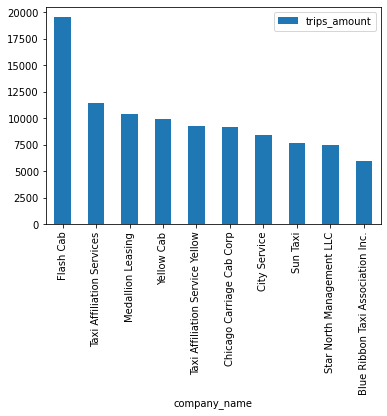

In [5]:
total_trip.plot(kind='bar', x='company_name', y='trips_amount')

Dapat dilihat pada grafik di atas adalah 10 perusahaan taxi dengan jumlah perjalanan terbanyak. perusahaan taxi Flash Cab paling  populer dapat dilihat dari jumlah perjalanannya yang paling tinggi diantara perusahaan lain.

#### Jumlah rata-rata perjalanan disetiap wilayah

In [6]:
dt = pd.read_csv('/datasets/project_sql_result_04.csv')
dt.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
average_trip= dt.sort_values('average_trips', ascending=False).head(10)
average_trip

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot:xlabel='dropoff_location_name'>

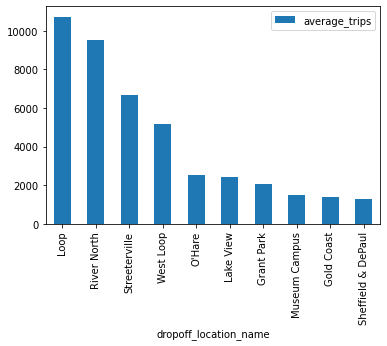

In [9]:
average_trip.plot(kind='bar', x='dropoff_location_name', y='average_trips')

Dapat dilihat pada grafik diatas yaitu di wilayah chicago yang jumlah perjalanannya paling banyak yaitu ada pada perjalanaan ke Loop, River North, Streeterville, West Loop dan O'Hare. Oleh karena itu kita akan melakukan pengujian hipotesis dari sampel data pada perjalanan dari Loop ke bandara O'Hare.

## Menguji hipotesis

Berikut adalah tabel yg berisi mengenai kondisi cuaca dan durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari sabtu.

Pada kolom weather_conditions jika kolom berisi Bad maka cuaca menunjukan rain atau storm, dan Good untuk sisanya yang tidak memuat kedua kata tersebut.

In [10]:
dw = pd.read_csv('/datasets/project_sql_result_07.csv')
dw.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [11]:
dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


### hipotesis

H0 = Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak berubah pada hari-hari Sabtu yang hujan

H1 = Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan

alpha = 5%, uji statistik (student t-test independen 2 sampel)

In [12]:
sample1 = dw[dw['weather_conditions'] == 'Good']['duration_seconds']

In [13]:
sample2 = dw[dw['weather_conditions'] == 'Bad']['duration_seconds']

In [14]:
st.levene(sample1, sample2)

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

karena pvalue lebih dari alpha maka equal_var = True

In [15]:
alpha = 0.05
results= st.ttest_ind(sample1, sample2, equal_var=True)

In [16]:
results.pvalue

6.517970327099473e-12

In [17]:
# Uji hipotesisnya
if (results.pvalue < alpha):
    print("Tolak null hypothesis")
else:
    print("Kita gagal menolak null hypothesis")

Tolak null hypothesis


Hasil uji hipotesis menunjukan Tolak null hipotesis atau H0 yang artinya Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan.

## Kesimpulan

Berdasarkan proses analisis pada basis data dari kompetitor, Preferensi penumpang cenderung  menggunakan jasa dari perusahaan taxi Flash Cab, karena dilihat dari jumlah perjalanannya yang paling tinggi diantara perusahaan taxi yang lain. Dan juga penumpang cenderung lebih banyak melakukan perjalanan ke Loop karena Loop adalah area ramai yang memiliki tempat makan eklektik, toko, teater, dan taman. Wilayah chicago lain yang jumlah perjalanannya paling banyak yaitu ada pada perjalanaan ke River North, Streeterville, West Loop dan O'Hare. Oleh karena itu saya melakukan pengujian hipotesis dari sampel data pada perjalanan dari Loop ke bandara O'Hare untuk mengetahui pengaruh cuaca terhadap frekuensi perjalanan.

Hasil uji hipotesis menunjukan Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan yang artinya cuaca dapat mempengaruhi frekuensi perjalanan. 